In [6]:
import numpy as np
import matplotlib.pyplot as plt
import CIT_Tools as CITT

In [7]:
omega_RF = 2* np.pi*300*1e3
z0 = 9*1e-3
r0 = 1e-2
xi = 2.36*1e-2

CylinderTrap = CITT.CIT(omega_RF,xi,z0,r0)


rs = np.linspace(0,0.95*r0,500)
zs = np.linspace(-z0,z0,1000)

In [8]:
VZs = []
VRs = []
tol = 1e-8
for r in rs:
    VRs.append(CylinderTrap.CITPotential(r,0,1,tol = tol))
VRs = np.array(VRs)

for z in zs:
    VZs.append(CylinderTrap.CITPotential(0,z,1,tol = tol))
VZs = np.array(VZs)

Text(0.5, 0, 'r / mm')

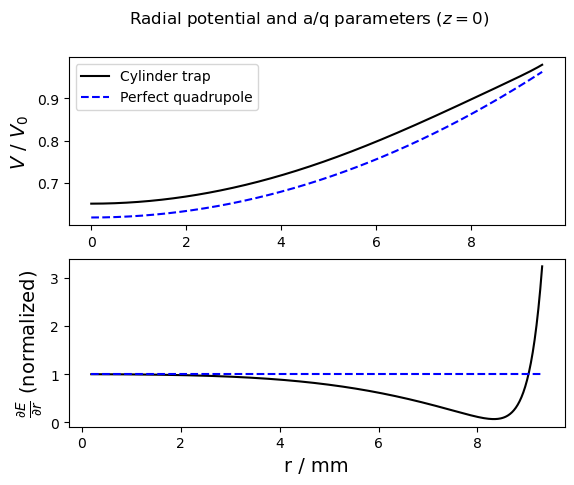

In [12]:
fsize = 14
figr,axr = plt.subplots(2,1)
spacing = (rs[1]-rs[0])*1e3

R = np.sqrt(CylinderTrap.r0**2 + 2*CylinderTrap.z0**2)

axr[0].plot(rs*1e3,VRs, 'k', label = 'Cylinder trap')
axr[0].plot(rs*1e3,1/R**2 * (rs**2 + 2 * CylinderTrap.z0**2), 'b--', label = 'Perfect quadrupole')

axr[1].plot(rs[10:-10]*1e3,np.gradient(np.gradient(VRs,spacing),spacing)[10:-10] / np.gradient(np.gradient(VRs,spacing),spacing)[10],'k')
axr[1].plot(rs[10:-10]*1e3,np.gradient(np.gradient(1/R**2 * (rs**2 + 2 * CylinderTrap.z0**2),spacing),spacing)[10:-10]/np.gradient(np.gradient(1/R**2 * (rs**2 + 2 * CylinderTrap.z0**2),spacing),spacing)[11], 'b--', label = 'Perfect quadrupole')

axr[0].legend()
figr.suptitle('Radial potential and a/q parameters ($z = 0$)',)

axr[0].set_ylabel(r'$V$ / $V_0$',fontsize = fsize)
axr[1].set_ylabel(r'$\frac{\partial E}{\partial r}$ (normalized)',fontsize = 14)
axr[1].set_xlabel('r / mm',fontsize = fsize)

500.0


Text(0.5, 0, 'z / mm')

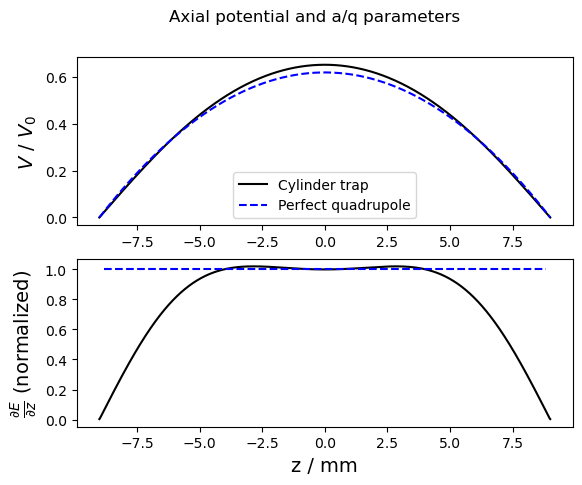

In [17]:
figz,axz = plt.subplots(2,1)


axz[0].plot(zs*1e3,VZs, 'k', label = 'Cylinder trap')
axz[0].plot(zs*1e3,1/(R**2)*(-2*(zs**2-CylinderTrap.z0**2)), 'b--', label = 'Perfect quadrupole')


print(np.floor(len(zs)/2))
axz[1].plot(zs*1e3,np.gradient((np.gradient(VZs,spacing)),spacing)/np.gradient((np.gradient(VZs,spacing)),spacing)[500],'k')
axz[1].plot(zs[10:-10]*1e3,np.gradient(np.gradient(1/(R**2)*(-2*(zs**2-CylinderTrap.z0**2)),spacing),spacing)[10:-10] / np.gradient(np.gradient(1/(R**2)*(-2*(zs**2-CylinderTrap.z0**2)),spacing),spacing)[500] , 'b--', label = 'Perfect quadrupole')

axz[0].legend()
figz.suptitle('Axial potential and a/q parameters ')

axz[0].set_ylabel(r'$V$ / $V_0$',fontsize = fsize)
# axz[0].set_ylim(0,0.7)
axz[1].set_ylabel(r'$\frac{\partial E}{\partial z}$ (normalized)',fontsize = 14)
axz[1].set_xlabel('z / mm',fontsize = fsize)

In [65]:
rs = np.linspace(0,0.95*r0,500)
zs = np.linspace(-0.95*z0,0.95*z0,1000)

Z, R  = np.meshgrid(zs,rs)
V = np.zeros((len(rs),len(zs)))
for j,z in enumerate(zs):
    for m,r in enumerate(rs):
        V[m,j] = CylinderTrap.CITPotentialV(r,z,1,30)
    print(j/len(zs)*100, '% Done')


np.savetxt('PotentialStrengthTrap.txt',V)
# V = np.loadtxt('PotentialStrengthTrap.txt')

0.0 % Done
0.1 % Done
0.2 % Done
0.3 % Done
0.4 % Done
0.5 % Done
0.6 % Done
0.7000000000000001 % Done
0.8 % Done
0.8999999999999999 % Done
1.0 % Done
1.0999999999999999 % Done
1.2 % Done
1.3 % Done
1.4000000000000001 % Done
1.5 % Done
1.6 % Done
1.7000000000000002 % Done
1.7999999999999998 % Done
1.9 % Done
2.0 % Done
2.1 % Done
2.1999999999999997 % Done
2.3 % Done
2.4 % Done
2.5 % Done
2.6 % Done
2.7 % Done
2.8000000000000003 % Done
2.9000000000000004 % Done
3.0 % Done
3.1 % Done
3.2 % Done
3.3000000000000003 % Done
3.4000000000000004 % Done
3.5000000000000004 % Done
3.5999999999999996 % Done
3.6999999999999997 % Done
3.8 % Done
3.9 % Done
4.0 % Done
4.1000000000000005 % Done
4.2 % Done
4.3 % Done
4.3999999999999995 % Done
4.5 % Done
4.6 % Done
4.7 % Done
4.8 % Done
4.9 % Done
5.0 % Done
5.1 % Done
5.2 % Done
5.3 % Done
5.4 % Done
5.5 % Done
5.6000000000000005 % Done
5.7 % Done
5.800000000000001 % Done
5.8999999999999995 % Done
6.0 % Done
6.1 % Done
6.2 % Done
6.3 % Done
6.4 % Done
6

In [66]:
zqit = zs#np.linspace(-0.95*r0/np.sqrt(2),0.95*r0/np.sqrt(2),1000)
Z , R  =np.meshgrid(zqit,rs)
V_QIT = np.zeros((len(rs),len(zqit)))
for j,z in enumerate(zqit):
    for m,r in enumerate(rs):
        V_QIT[m,j] = 1 /((2*CylinderTrap.z0**2)+CylinderTrap.r0**2) * (r**2-2*(z**2-CylinderTrap.z0**2))
    # print(j/len(zs)*100, '% Done')



10.0


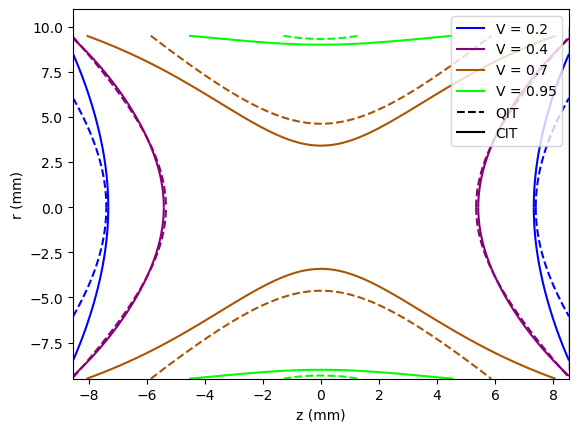

[[0. 0. 1. 1.]]


In [76]:
# V = np.loadtxt('PotentialStrengthTrap.txt')
fig, ax = plt.subplots()
# Create contour plots
levels = [ 0.2, 0.4, 0.7,0.95]

C = ax.contour(zs*1e3, rs*1e3, V,levels, cmap='brg')
ax.contour(zs*1e3, -rs*1e3, V,levels, cmap='brg')
CQIT = ax.contour(zqit*1e3, rs*1e3, V_QIT,levels, cmap='brg', linestyles='--')
ax.contour(zqit*1e3, -rs*1e3, V_QIT,levels, cmap='brg', linestyles='--')

# Label the contours
# ax.clabel(C,  inline=True, fontsize=10)
for pathcoll,level in zip(C.collections,levels):
    ax.plot([],[],color = pathcoll.get_edgecolor()[0],label = 'V = {0}'.format(level))

# Set labels and limits
ax.set_xlabel(r'z (mm)')
ax.set_ylabel(r'r (mm)')

ax.axhline(r0*1e3,-z0*1e3,z0*1e3, color='black')
ax.axhline(-r0*1e3,-z0*1e3,z0*1e3, color='black')
ax.axvline(z0*1e3,ymin = -r0 *1e3,ymax = r0*1e3, color='black')
ax.axvline(-z0*1e3,-r0 * 1e3, r0*1e3, color='black')
print(r0*1e3)
ax.plot([],[],color = 'k',ls = '--',label = 'QIT')
ax.plot([],[],color = 'k',ls = '-',label = 'CIT')

ax.legend()
plt.show()
print(C.collections[0].get_edgecolor())

Text(0, 0.5, 'r / mm')

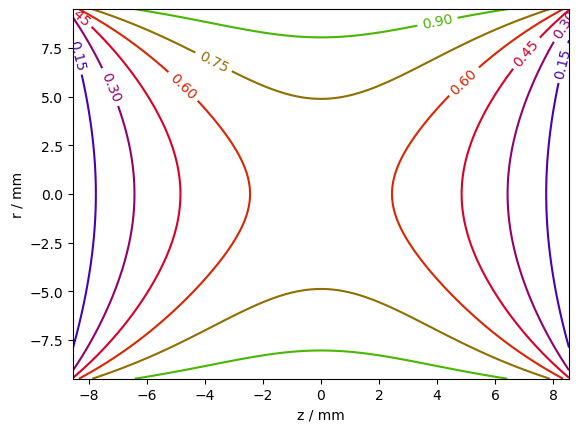

In [68]:
fig,ax = plt.subplots()
C = ax.contour(zs*1e3,rs*1e3,V, cmap = 'brg')
ax.contour(zs*1e3,-rs*1e3,V, cmap = 'brg')


ax.clabel(C, inline = True, fontsize = 10)
ax.set_xlabel('z / mm')
ax.set_ylabel('r / mm')

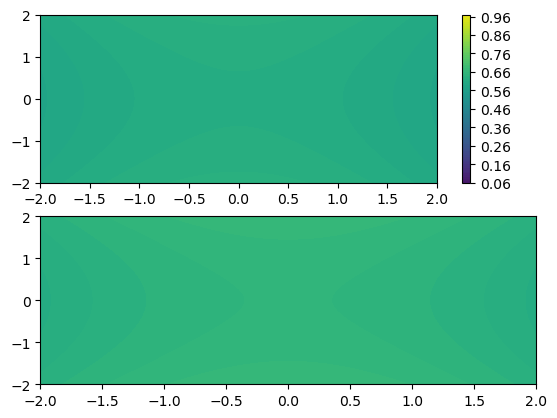

In [69]:
fig,ax = plt.subplots(2,1)
CDiff = ax[0].contourf(Z*1e3,R*1e3,V_QIT,levels = 100,vmin = 0,vmax = 1)
ax[0].contourf(Z*1e3,-R*1e3,V_QIT,levels = 100,vmin = 0,vmax = 1)
fig.colorbar(CDiff)

CDiff2 = ax[1].contourf(Z*1e3,R*1e3,V,levels = 100,vmin = 0,vmax = 1)
ax[1].contourf(Z*1e3,-R*1e3,V,levels = 100,vmin = 0,vmax = 1)
for axe in ax:
    axe.set_xlim(-2,2)
    axe.set_ylim(-2,2)